In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
# Data Preparation
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [3]:
class PCA:
    def __init__(self, n_components=0):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # standardize the data
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        Z = (X - mean) / std

        # covariance
        cov = np.cov(Z.T)
        
        # display covariance matrix
        sns.heatmap(cov)
        plt.show()

        # compute eigenvalues and eigenvectors for the feature space
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # index eigenvalues in descending order
        eigenvectors = eigenvectors.T
        indices = eigenvalues.argsort()[::-1]
        
        # sort eigenvalues and eigenvectors according to indices
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[indices]

        explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

        # store first n eigenvectors
        self.n_components = max(self.n_components, np.argmax(explained_var >= 0.5) + 1)
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        mean = X.mean()
        std = X.std()
        Z = (X - mean) / std

        return np.dot(Z, self.components.T)


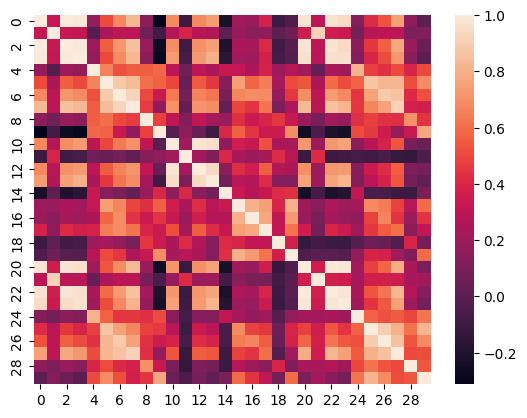

Shape of X: (569, 30)
Shape of transformed X: (569, 2)


/var/folders/nt/r73pl9nj4yx73xx0h_35n2fh0000gn/T/ipykernel_6695/615908071.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


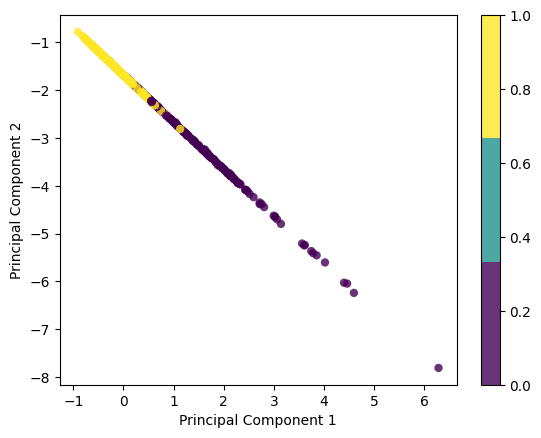

In [4]:
# Perform PCA

# 1. Project the data onto the 2 primary principal components
pca = PCA()
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

# Visualize the projection
plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()